In [14]:
# ------------------------------------------------------------------------------ #
# @Author:        F. Paul Spitzner
# @Email:         paul.spitzner@ds.mpg.de
# @Created:       2023-08-01 11:17:08
# @Last Modified: 2023-08-15 16:03:56
# ------------------------------------------------------------------------------ #
# ------------------------------------------------------------------------------ #

%reload_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy
%reload_ext watermark

import logging
logging.basicConfig(
    format="%(asctime)s | %(levelname)-8s | %(name)-s | %(funcName)-s | %(message)s",
    level=logging.WARNING,
)
log = logging.getLogger("notebook")
log.setLevel("DEBUG")

import re
import glob
import h5py
import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import dask

from tqdm import tqdm


# also needs to be added for each dask-worker
extra_path = os.path.abspath('../')
sys.path.append(extra_path)
log.info(f"project directory: {extra_path}")

from ana import utility as utl
# utl.log.setLevel("DEBUG")


2023-08-28 15:27:15,917 | INFO     | notebook | <module> | project directory: /Users/paul/para/2_Projects/information_timescales/repo/_latest/experiment_analysis


In [40]:
data_dir = "../../../gnode/experiment_analysis/dat/"
meta_df = utl.all_unit_metadata(data_dir, reload=False)
meta_df = utl.load_spikes(meta_df, format="xarray")
meta_df = utl.default_filter(meta_df, trim=False)

utl.prepare_spike_times(*meta_df.iloc[0][["spiketimes", "stimulus"]])

Loading spikes for sessions: 100%|██████████| 58/58 [00:38<00:00,  1.52it/s]


<xarray.DataArray (spiketimes: 18196)>
array([1.4160156e-01, 1.7285156e-01, 1.9677734e-01, ..., 8.3986597e+02,
       8.3993311e+02, 8.3994580e+02], dtype=float32)
Coordinates:
    session   int64 787025148
    stimulus  <U30 'natural_movie_one_more_repeats'
    block     <U3 '3.0'
    unit_id   int64 951013153
Dimensions without coordinates: spiketimes

In [41]:
print(utl.prepare_spike_times(*meta_df.iloc[0][["spiketimes", "stimulus"]]))
meta_df

<xarray.DataArray (spiketimes: 18196)>
array([1.4160156e-01, 1.7285156e-01, 1.9677734e-01, ..., 8.3986597e+02,
       8.3993311e+02, 8.3994580e+02], dtype=float32)
Coordinates:
    session   int64 787025148
    stimulus  <U30 'natural_movie_one_more_repeats'
    block     <U3 '3.0'
    unit_id   int64 951013153
Dimensions without coordinates: spiketimes


,session,stimulus,block,unit_id,ecephys_structure_acronym,invalid_spiketimes_check,recording_length,firing_rate,filepath,num_spikes,spiketimes
0,787025148,natural_movie_one_more_repeats,3.0,951013153,VISam,SUCCESS,900.668701,21.542880,/Users/paul/para/2_Projects/information_timesc...,19403,[[[<xarray.DataArray (spiketimes: 30719)>\narr...
1,787025148,natural_movie_one_more_repeats,3.0,951013143,VISam,SUCCESS,900.718262,11.652925,/Users/paul/para/2_Projects/information_timesc...,10496,[[[<xarray.DataArray (spiketimes: 30719)>\narr...
2,787025148,natural_movie_one_more_repeats,3.0,951013133,VISam,SUCCESS,894.867676,0.448111,/Users/paul/para/2_Projects/information_timesc...,401,[[[<xarray.DataArray (spiketimes: 30719)>\narr...
3,787025148,natural_movie_one_more_repeats,3.0,951013202,VISam,SUCCESS,900.264893,2.384853,/Users/paul/para/2_Projects/information_timesc...,2147,[[[<xarray.DataArray (spiketimes: 30719)>\narr...
4,787025148,natural_movie_one_more_repeats,3.0,951013187,VISam,SUCCESS,896.074707,0.706414,/Users/paul/para/2_Projects/information_timesc...,633,[[[<xarray.DataArray (spiketimes: 30719)>\narr...
...,...,...,...,...,...,...,...,...,...,...,...
31185,821695405,spontaneous,null,951109353,VISal,SUCCESS,1802.059082,4.322832,/Users/paul/para/2_Projects/information_timesc...,7790,[[[<xarray.DataArray (spiketimes: 72647)>\narr...
31186,821695405,spontaneous,null,951110024,VISal,SUCCESS,1802.356445,1.460311,/Users/paul/para/2_Projects/information_timesc...,2632,[[[<xarray.DataArray (spiketimes: 72647)>\narr...
31187,821695405,spontaneous,null,951109432,VISal,SUCCESS,1801.380371,4.220653,/Users/paul/para/2_Projects/information_timesc...,7603,[[[<xarray.DataArray (spiketimes: 72647)>\narr...
31188,821695405,spontaneous,null,951109459,VISal,SUCCESS,1699.346191,0.102981,/Users/paul/para/2_Projects/information_timesc...,175,[[[<xarray.DataArray (spiketimes: 72647)>\narr...


In [29]:
spikes = np.array([1,2,3])
spikes[0:0]

array([], dtype=int64)

In [25]:
meta_df = utl.default_filter(meta_df, trim=False)

2023-08-28 15:33:56,498 | WARNING  | its_utility | default_filter | 851 rows already have values other than `SUCCESS` in the `invalid_spiketimes_check`. We overwrite them.


In [ ]:
for index, df in meta_df.groupby(["stimulus", "block"]):
    duration = df["recording_length"].median()
    print(f"{index}: {len(df)} rows, median duration: {duration:.2f}")

('natural_movie_one_more_repeats', '3.0'): 6022 rows, median duration: 899.97
('natural_movie_one_more_repeats', '8.0'): 6022 rows, median duration: 900.17
('natural_movie_three', '3.0'): 6562 rows, median duration: 599.80
('natural_movie_three', '6.0'): 6562 rows, median duration: 599.97
('spontaneous', 'null'): 6022 rows, median duration: 1801.61


(500.0, 600.0)

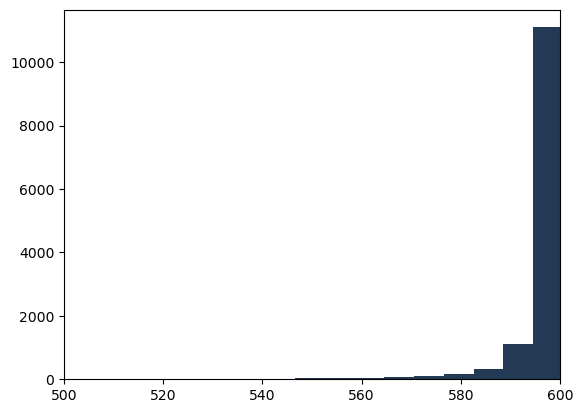

In [9]:
fig, ax = plt.subplots()
ax.hist(meta_df.query("stimulus == 'natural_movie_three'")["recording_length"], bins=100);
ax.set_xlim(500, 600)

In [4]:
# convert all spiketimes from xarray to numpy
meta_df["spiketimes"] = meta_df["spiketimes"].apply(lambda x: x.values.flatten())

In [11]:
meta_df.to_feather("/Users/paul/Desktop/meta_df.feather")

In [12]:
foo = pd.read_feather("/Users/paul/Desktop/meta_df.feather")
foo

,session,stimulus,block,unit_id,ecephys_structure_acronym,invalid_spiketimes_check,recording_length,firing_rate,filepath,num_spikes,spiketimes
0,787025148,natural_movie_one_more_repeats,3.0,951013153,VISam,SUCCESS,900.668806,21.542880,/Users/paul/para/2_Projects/information_timesc...,19403,"[2297.1938, 2297.2266, 2297.2595, 2297.2847, 2..."
1,787025148,natural_movie_one_more_repeats,3.0,951013143,VISam,SUCCESS,900.718039,11.652925,/Users/paul/para/2_Projects/information_timesc...,10496,"[2297.2188, 2297.2615, 2297.2722, 2297.3352, 2..."
2,787025148,natural_movie_one_more_repeats,3.0,951013133,VISam,SUCCESS,894.867666,0.448111,/Users/paul/para/2_Projects/information_timesc...,401,"[2301.4895, 2304.6262, 2318.3127, 2318.4626, 2..."
3,787025148,natural_movie_one_more_repeats,3.0,951013202,VISam,SUCCESS,900.265072,2.384853,/Users/paul/para/2_Projects/information_timesc...,2147,"[2297.3667, 2297.4749, 2297.5432, 2297.5715, 2..."
4,787025148,natural_movie_one_more_repeats,3.0,951013187,VISam,SUCCESS,896.074534,0.706414,/Users/paul/para/2_Projects/information_timesc...,633,"[2299.9456, 2299.9705, 2300.328, 2300.6438, 23..."
...,...,...,...,...,...,...,...,...,...,...,...
31185,821695405,spontaneous,null,951109353,VISal,SUCCESS,1802.059343,4.322832,/Users/paul/para/2_Projects/information_timesc...,7790,"[4394.321, 4394.8145, 4394.945, 4395.0215, 439..."
31186,821695405,spontaneous,null,951110024,VISal,SUCCESS,1802.356277,1.460311,/Users/paul/para/2_Projects/information_timesc...,2632,"[4394.0005, 4394.791, 4395.0347, 4395.234, 439..."
31187,821695405,spontaneous,null,951109432,VISal,SUCCESS,1801.380210,4.220653,/Users/paul/para/2_Projects/information_timesc...,7603,"[4394.1562, 4394.2617, 4394.8813, 4395.3687, 4..."
31188,821695405,spontaneous,null,951109459,VISal,SUCCESS,1699.346106,0.102981,/Users/paul/para/2_Projects/information_timesc...,175,"[4478.77, 4500.9507, 4501.108, 4523.8774, 4567..."


In [13]:
# compare dataframes
pd.testing.assert_frame_equal(meta_df, foo)


In [3]:
# specify this as closely as possible, we search recursively through all subdirs
raw_dir = "/data.nst/share/data/allen_visual_coding_neuropixels/"
raw_files = glob.glob(raw_dir + "/**/*.h5", recursive=True)
log.debug(f"Found {len(raw_files)} hdf5 files in {raw_dir}")
raw_files[0]

2023-03-13 11:42:51,707 | DEBUG    | notebook     | Found 58 hdf5 files in /data.nst/share/data/allen_visual_coding_neuropixels/


'/data.nst/share/data/allen_visual_coding_neuropixels/session_774875821/session_774875821_spike_data.h5'

In [4]:
%reload_ext ipy_dict_hierarchy



foo = h5py.File(raw_files[0], "r")
foo


<HDF5 file "session_774875821_spike_data.h5" (mode r)>
├── session_774875821_stimulus_natural_movie_one_more_repeats_stimulus_block_3.0_metadata  
│   ├── axis0 ........................................................ Dataset  (5,)
│   ├── axis1 ........................................................ Dataset  (190,)
│   ├── block0_items ................................................. Dataset  (2,)
│   ├── block0_values ................................................ Dataset  (190, 2)
│   ├── block1_items ................................................. Dataset  (1,)
│   ├── block1_values ................................................ Dataset  (190, 1)
│   ├── block2_items ................................................. Dataset  (2,)
│   └── block2_values ................................................ Dataset  (1,)
├── session_774875821_stimulus_natural_movie_one_more_repeats_stimulus_block_3.0_spiketimes  Dataset  (190, 24258)
├── session_774875821_stimulus_natural_movie_one

In [5]:
def key_to_parts(key):
    """
    We have a convention to store data in hdf5 files. 
    Each group key looks like this:
    `session_774875821_stimulus_natural_movie_one_more_repeats_ \
    stimulus_block_8.0_spiketimes`

    with this helper we use regex to get the individual parts as a dict:
    session (int):
    stimulus (str):
    block (str):
    kind (str): either metadata or spiketimes
    """

    parts = dict()

    # regex magic to get parts of the key
    # session is the integer sequence after `session_`
    parts["session"] = re.search(r"session_(\d+)_", key).group(1)
    parts["stimulus"] = re.search(r"stimulus_(.+)_stimulus_block", key).group(1)
    parts["block"] = re.search(r"stimulus_block_(.+)_", key).group(1)
    # word characters after last `_` and before the end of the key
    parts["kind"] = re.search(r"_([a-zA-Z0-9.-]+)$", key).group(1)

    if parts["kind"] not in ["metadata", "spiketimes"]:
        raise ValueError(f"Unknown kind {parts['kind']} for key '{key}'")

    # blocks shall always remain strings, make sure sessions are integers?
    # units from metadata dataframe are int64, anyway. mightaswell be consistent.
    parts["session"] = int(parts["session"])

    return parts


def load_session(session_filepath, meta_only=False):
    """
    Load a single session as dictionary.
    optionally, only get metadata.
    """

    session_dict = dict()

    # in my current implementation, we touch the file a bunch of times :/
    with h5py.File(session_filepath, "r") as f:
        # there should only be one session per file, but this makes it easier to handle, later
        keys = list(f.keys())

    # start by loading the metadata and setting the directory structure
    for key in keys:
        # keys are specific for stimulus-block pairs, and come in pairs:
        # one ending with _metadata (a panadas dataframe)
        # one ending with _spiketimes (a nan-padded 2d array, nid x spikes)
        if not key.endswith("_metadata"):
            continue

        parts = key_to_parts(key)
        session = parts["session"]
        stimulus = parts["stimulus"]
        block = parts["block"]

        if session not in session_dict:
            session_dict[session] = dict()
            # this becomes a problem when trying to get the metadata across all units
            # session_dict[session]["_filepath"] = session_filepath

        if stimulus not in session_dict[session]:
            session_dict[session][stimulus] = dict()

        if block not in session_dict[session][stimulus]:
            session_dict[session][stimulus][block] = dict()

        # load the metadata.
        # pandas operates on the file -> have to open twice
        # which will only work if we saved in swmr mode.
        meta_df = pd.read_hdf(
            session_filepath, key=key.replace("_spiketimes", "_metadata")
        )
        # set unit_id as index, but keep it as a column for convenience
        meta_df.set_index("unit_id", inplace=True, drop=False)
        session_dict[session][stimulus][block]["metadata"] = meta_df

        # on the block level, units should be unique
        assert len(meta_df) == len(meta_df["unit_id"].unique())

    if meta_only:
        return session_dict

    # now load the spiketimes
    with h5py.File(session_filepath, "r") as f:
        for key in keys:
            if not key.endswith("_spiketimes"):
                continue

            parts = key_to_parts(key)
            session = parts["session"]
            stimulus = parts["stimulus"]
            block = parts["block"]

            # load data to ram, and convert to xarray so we can to conveniently
            # index via unit_id
            session_dict[session][stimulus][block]["spiketimes"] = xr.DataArray(
                data=f[key][:],
                dims=["unit_id", "spiketimes"],
                coords={"unit_id": meta_df.index.values},
            )

    return session_dict


session_dict = load_session(raw_files[0], meta_only=False)
session_dict

<class 'dict'>
└── 774875821                                                                 
    ├── natural_movie_one_more_repeats                                        
    │   ├── 3.0                                                               
    │   │   ├── metadata ........................................... DataFrame
    │   │   └── spiketimes ......................................... DataArray
    │   └── 8.0                                                               
    │       ├── metadata ........................................... DataFrame
    │       └── spiketimes ......................................... DataArray
    └── spontaneous                                                           
        └── null                                                              
            ├── metadata ........................................... DataFrame
            └── spiketimes ......................................... DataArray

In [6]:
# data indexing is a breeze with xarray

block = session_dict[774875821]["natural_movie_one_more_repeats"]["8.0"]
print(f'unit ids are the meta index:\n{block["metadata"].index.values[0:5]}')
print(f'metadata for unit id:\n{block["metadata"].loc[950987325]}')

# but also a column
unit_a = block["metadata"]["unit_id"].iloc[0]
unit_b = block["metadata"]["unit_id"].iloc[4]

print(f"spiking data as xarray...")
spikes = block["spiketimes"]
spikes.loc[unit_a:unit_b, :]


unit ids are the meta index:
[950987325 950987344 950987340 950987352 950987362]
metadata for unit id:
unit_id                       950987325
ecephys_structure_acronym         VISam
invalid_spiketimes_check        SUCCESS
recording_length             900.415448
firing_rate                    3.463957
Name: 950987325, dtype: object
spiking data as xarray...


<xarray.DataArray (unit_id: 5, spiketimes: 30488)>
array([[7395.375 , 7395.6963, 7395.9673, ...,       nan,       nan,
              nan],
       [7398.928 , 7400.5156, 7400.53  , ...,       nan,       nan,
              nan],
       [7395.3438, 7399.2227, 7399.278 , ...,       nan,       nan,
              nan],
       [7395.4497, 7395.5327, 7395.62  , ...,       nan,       nan,
              nan],
       [7395.281 , 7395.386 , 7395.469 , ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * unit_id  (unit_id) int64 950987325 950987344 950987340 950987352 950987362
Dimensions without coordinates: spiketimes

In [ ]:
# lets get the metadata for all units across all sessions into a single dataframe!


meta_df = []

for fp in tqdm(raw_files):
    session_dict = load_session(fp, meta_only=True)
    for session in session_dict:
        for stimulus in session_dict[session]:
            for block in session_dict[session][stimulus]:
                df = session_dict[session][stimulus][block]["metadata"]
                df["session"] = session
                df["stimulus"] = stimulus
                df["block"] = block
                df["filepath"] = fp
                meta_df.append(df)

meta_df = pd.concat(meta_df, axis=0, ignore_index=True)

# unit_id repetitions are expected when combining sessions / stimuli / or blocks.
print(f"len meta_df: {len(meta_df)}")
print(f"len unique unit_ids: {len(meta_df['unit_id'].unique())}")

meta_df.set_index("unit_id", inplace=True, drop=False)
meta_df.loc[950987325]

In [ ]:
meta_df.query("stimulus == 'natural_movie_one_more_repeats'").groupby(
    ["session", "stimulus", "block"]
).count()

# Implementing this in the module

In [120]:
meta_df = utl.all_unit_metadata(reload=True)
meta_df.stimulus.unique()

2023-03-13 16:14:13,620 | DEBUG    | ana.utility  | Found 58 hdf5 files in /data.nst/share/data/allen_visual_coding_neuropixels/
Fetching metadata from sessions: 100%|██████████| 58/58 [00:02<00:00, 25.97it/s]


array(['natural_movie_one_more_repeats', 'spontaneous',
       'natural_movie_three'], dtype=object)

In [121]:
# The filtering should be easy now
meta_df = utl.all_unit_metadata(reload=True)

# meta_df.query("stimulus == 'natural_movie_one_more_repeats' & block == '8.0' & invalid_spiketimes_check == 'SUCCESS'")
print(len(meta_df.query('invalid_spiketimes_check == "SUCCESS"')))

meta_df.loc[meta_df["firing_rate"] < 0.01, "invalid_spiketimes_check"] = "ERR_LO_FIR_RATE"
meta_df.loc[meta_df["recording_length"] == 0, "invalid_spiketimes_check"] = "ERR_EMPTY"

print(len(meta_df.query('invalid_spiketimes_check == "SUCCESS"')))

meta_df.reset_index(inplace=True, drop=True)

# set index to unit and stimulus
meta_df.set_index(["unit_id", "stimulus"], inplace=True, drop=True)

# stationarity. group by units and stimuli,
# and if the stim has two blocks, check that the rate is not too far off between blocks
for (unit_id, stimulus), df in tqdm(meta_df.groupby(["unit_id", "stimulus"])):
    if len(df) < 2:
        continue

    # get the firing rate for the first and second block
    fr1 = df.iloc[0]["firing_rate"]
    fr2 = df.iloc[1]["firing_rate"]

    # if the difference is too big, mark the unit as invalid
    if abs(fr1 - fr2) / np.mean([fr1, fr2]) > 0.5:
        meta_df.loc[(unit_id, stimulus), "invalid_spiketimes_check"] = "ERR_STATIONARITY"

meta_df.reset_index(inplace=True, drop=False)

print(len(meta_df.query('invalid_spiketimes_check == "SUCCESS"')))

# sanity check - this should not occur
meta_df.query(
    "stimulus == 'spontaneous' & invalid_spiketimes_check == 'ERR_STATIONARITY'"
)

2023-03-13 16:14:18,185 | DEBUG    | ana.utility  | Found 58 hdf5 files in /data.nst/share/data/allen_visual_coding_neuropixels/
Fetching metadata from sessions: 100%|██████████| 58/58 [00:02<00:00, 24.36it/s]


30912
30842


100%|██████████| 18606/18606 [00:05<00:00, 3126.27it/s]


23357


,unit_id,stimulus,ecephys_structure_acronym,invalid_spiketimes_check,recording_length,firing_rate,filepath,num_spikes,session,block


In [21]:
transient = 5
target_length = 1500

# check the duration for single blocks
idx = meta_df.query(
    f"stimulus == 'spontaneous'"
    + f" & recording_length < {0.9 * (target_length + transient)}"
).index
meta_df.loc[idx, "invalid_spiketimes_check"] = "ERR_REC_LEN"

# check total duration of two=block stimuli
idx = meta_df.query(
    f"stimulus != 'spontaneous'"
    + f" & recording_length < {0.9 * (target_length / 2 + transient)}"
).index
meta_df.loc[idx, "invalid_spiketimes_check"] = "ERR_REC_LEN"

print(len(meta_df.query('invalid_spiketimes_check == "SUCCESS"')))


13370


In [117]:
meta_df = utl.all_unit_metadata(reload=True)
new_df = utl.default_filter(meta_df)

2023-03-13 14:26:37,890 | DEBUG    | ana.utility  | Found 58 hdf5 files in /data.nst/share/data/allen_visual_coding_neuropixels/
Fetching metadata from sessions: 100%|██████████| 58/58 [00:02<00:00, 21.92it/s]
2023-03-13 14:26:40,566 | DEBUG    | ana.utility  | Default quality checks, valid rows before: 30912
2023-03-13 14:26:40,571 | DEBUG    | ana.utility  | After rate check: 30842
2023-03-13 14:26:40,576 | DEBUG    | ana.utility  | After zero-length check: 30842
Stationarity check: 100%|██████████| 18606/18606 [00:05<00:00, 3241.72it/s]
2023-03-13 14:26:47,092 | DEBUG    | ana.utility  | After stationarity check: 23357
2023-03-13 14:26:47,105 | DEBUG    | ana.utility  | After minmum-duration check: 13370


In [140]:
import humanize
session = utl.load_session(meta_df["filepath"].iloc[0], filter=dict(block=["3.0", "8.0"]))
session = utl.load_spikes(session)
merged = utl.merge_blocks(session)
merged


2023-03-13 16:38:38,738 | DEBUG    | ana.utility  | Loading spikes for 190 units, 1 sessions, 1 stimuli, 2 blocks, with max 30488 spikes.
2023-03-13 16:38:38,739 | DEBUG    | ana.utility  | In total 380 rows for pandas dataframe.
Loading sessions: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


,session,stimulus,block,unit_id,ecephys_structure_acronym,invalid_spiketimes_check,recording_length,firing_rate,filepath,num_spikes,spiketimes
0,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,950987325,VISam,SUCCESS,6002.419922,0.818836,/data.nst/share/data/allen_visual_coding_neuro...,4915,"[<xarray.DataArray ()>\narray(2293.3699, dtype..."
2,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,950987340,VISam,SUCCESS,6003.170898,0.564702,/data.nst/share/data/allen_visual_coding_neuro...,3390,"[<xarray.DataArray ()>\narray(2291.216, dtype=..."
1,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,950987344,VISam,SUCCESS,5998.423828,0.375265,/data.nst/share/data/allen_visual_coding_neuro...,2251,"[<xarray.DataArray ()>\narray(2291.081, dtype=..."
3,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,950987352,VISam,SUCCESS,6004.656250,0.713280,/data.nst/share/data/allen_visual_coding_neuro...,4283,"[<xarray.DataArray ()>\narray(2291.081, dtype=..."
4,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,950987362,VISam,SUCCESS,6004.924805,1.330241,/data.nst/share/data/allen_visual_coding_neuro...,7988,"[<xarray.DataArray ()>\narray(2291.0823, dtype..."
...,...,...,...,...,...,...,...,...,...,...,...
188,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,951000146,VISrl,SUCCESS,6004.505371,8.316588,/data.nst/share/data/allen_visual_coding_neuro...,49937,"[<xarray.DataArray ()>\narray(2291.2104, dtype..."
189,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,951000449,VISrl,SUCCESS,6004.264648,2.254231,/data.nst/share/data/allen_visual_coding_neuro...,13535,"[<xarray.DataArray ()>\narray(2291.115, dtype=..."
165,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,951000804,VISrl,SUCCESS,6004.572266,1.395104,/data.nst/share/data/allen_visual_coding_neuro...,8377,"[<xarray.DataArray ()>\narray(2291.1536, dtype..."
179,774875821,natural_movie_one_more_repeats,merged_3.0_and_8.0,951000839,VISrl,SUCCESS,6004.620117,1.531154,/data.nst/share/data/allen_visual_coding_neuro...,9194,"[<xarray.DataArray ()>\narray(2291.1667, dtype..."


In [138]:
merged.iloc[0]["spiketimes"]

<xarray.DataArray (spiketimes: 4915)>
array([2293.3699, 2293.877 , 2295.2087, ..., 8293.64  , 8294.593 ,
       8295.79  ], dtype=float32)
Coordinates:
    session   int64 774875821
    stimulus  <U30 'natural_movie_one_more_repeats'
    block     <U18 'merged_3.0_and_8.0'
    unit_id   int64 950987325
Dimensions without coordinates: spiketimes

In [19]:
selected_df = meta_df.query('invalid_spiketimes_check == "SUCCESS" & stimulus == "natural_movie_one_more_repeats"')
selected_df["num_spikes"].max()

89514

In [39]:
units = list(meta_df["unit_id"].values[:5000])
selected_df = meta_df.query('invalid_spiketimes_check == "SUCCESS" & unit_id in @units')
selected_df.filepath.unique()

array(['/data.nst/share/data/allen_visual_coding_neuropixels/session_774875821/session_774875821_spike_data.h5',
       '/data.nst/share/data/allen_visual_coding_neuropixels/session_839557629/session_839557629_spike_data.h5',
       '/data.nst/share/data/allen_visual_coding_neuropixels/session_816200189/session_816200189_spike_data.h5',
       '/data.nst/share/data/allen_visual_coding_neuropixels/session_835479236/session_835479236_spike_data.h5',
       '/data.nst/share/data/allen_visual_coding_neuropixels/session_821695405/session_821695405_spike_data.h5'],
      dtype=object)

In [114]:
utl.log.setLevel("DEBUG")
df = utl.load_spikes(selected_df)


# 

2023-03-13 13:52:40,374 | DEBUG    | ana.utility  | Loading spikes for 980 units, 5 sessions, 2 stimuli, 3 blocks, with max 133313 spikes.
2023-03-13 13:52:40,375 | DEBUG    | ana.utility  | In total 2241 rows for pandas dataframe.
Loading sessions: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


In [113]:
unit_a = df["unit_id"].iloc[0]
df.set_index("unit_id", inplace=True, drop=False)
df.iloc[0]["spiketimes"].coords

Coordinates:
  * session   (session) int64 774875821
  * stimulus  (stimulus) object 'natural_movie_one_more_repeats'
  * block     (block) object '3.0'
    unit_id   int64 950987340

In [50]:
oc

<class 'dict'>
├── session ............................................................. list  (5)
├── stimulus ............................................................ list  (2)
├── block ............................................................... list  (3)
└── unit_id ............................................................. list  (980)

In [37]:
from humanize import naturalsize
naturalsize(final_df.nbytes)
del final_df

# Spike binning

In [ ]:
spikes_1 = np.sort(np.random.random(1000)) * 10
spikes_2 = np.sort(np.random.random(900)) * 9

spikes_1 = spikes_1
spikes_2 = spikes_2

b1 = utl.get_binned_spike_times([spikes_1, spikes_2], 0.1)
b2 = utl.binned_spike_count([spikes_1, spikes_2], 0.1)

In [ ]:
# need to discuss the alignment convention!
np.all(b1 == b2)


True

In [ ]:
%timeit utl.get_binned_spike_times([spikes_1, spikes_2], 0.1)
%timeit utl.binned_spike_count([spikes_1, spikes_2], 0.1)

1.15 ms ± 802 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
117 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
print(b1.shape)
print(b2.shape)

(2, 100)
(2, 100)


In [ ]:
# print(b1)
# print(b2)
idx = np.where(b1 != b2)
print(b1[idx])
print(b2[idx])


[]
[]


In [ ]:
b2.shape


(2, 100)